# Problem Session 1
## Data Collection

The problems contained in this notebook relate to the concepts covered in the `Data Collection` lecture notebooks.

##### 1. Searching repositories/competition sites

You are interested in a project that looks at the opening and closing prices of the SNP500 stock index. Using one of the data repository or data competition sites discussed in `2. Data Repositories.ipynb` or `3. Data Competition Sites.ipynb` find a data file that contains the closing and opening values going back to 1928.

##### Sample Solution

A file that answers this can be found at kaggle.com, <a href="https://www.kaggle.com/datasets/joshuaquahshousing/snp500-max">https://www.kaggle.com/datasets/joshuaquahshousing/snp500-max</a>.

##### 2. Scraping college football data I

Using `BeautifulSoup` scrape the data contained in the "110 Years" table at this link, <a href="https://www.sports-reference.com/cfb/schools/ohio-state/">https://www.sports-reference.com/cfb/schools/ohio-state/</a>, and record the values stored in the "Coaches" columns in a list. Who had the most years as the Ohio State University football coach?

##### Sample Solution

In [1]:
## Import packages
import pandas as pd
from bs4 import BeautifulSoup

import requests

In [2]:
## This url takes you straight to the table
url = "https://www.sports-reference.com/cfb/schools/ohio-state/"

## request the htmls
html = requests.get(url)

## make some soup
soup = BeautifulSoup(html.content, 'html.parser')

In [3]:
## get the table's body
table = soup.find('table', {'id':"ohio-state"}).tbody

In [4]:
## Each coach entry is stored in a 'td' with a 'data-stat'="coaches"
coaches = table.find_all('td', {'data-stat':"coaches"})

## Writing a list comprehension to get the names
coaches = [td.a.text for td in coaches]

In [5]:
pd.Series(coaches).value_counts()

Woody Hayes        28
John Wilce         16
John Cooper        13
Jim Tressel        10
Earle Bruce         9
Francis Schmidt     7
Urban Meyer         6
Sam Willaman        5
Ryan Day            4
Wesley Fesler       4
Paul Brown          3
Carroll Widdoes     2
Luke Fickell        1
Paul Bixler         1
Edwin Sweetland     1
dtype: int64

Woody Hayes was coach for 28 years, longer than any other Buckeye coach.

##### 3. Scraping college football data II

Use `BeautifulSoup` to scrape the "Defense & Fumbles" table. Create a `DataFrame` containing the name of the player, the number of games that player played (stored under "G"), the total number of tackles they had (stored under "Tot"), and the total number sacks (stored under "Sk").  Who has the most tackles per game? Who had the highest fraction of their tackles as a sack?

##### Hint: This stack overflow post could be useful, <a href="https://stackoverflow.com/questions/33138937/how-to-find-all-comments-with-beautiful-soup">https://stackoverflow.com/questions/33138937/how-to-find-all-comments-with-beautiful-soup</a>.

##### Sample Solution

In [6]:
## This url takes you straight to the table
url = "https://www.sports-reference.com/cfb/schools/ohio-state/2021.html#all_defense_and_fumbles"

## request the htmls
html = requests.get(url)

## make some soup
soup = BeautifulSoup(html.content, 'html.parser')

In [7]:
soup.find('table', {'id':"defense_and_fumbles"})

`BeautifulSoup` is unable to find the specified table. This is because it is stored as an HTML comment. So we have to search the comments to get the table we want.

In [8]:
## Import Comment
from bs4 import Comment

In [9]:
comments = soup.find_all(string=lambda text: isinstance(text, Comment))

In [10]:
## search for the comment that has our table in it
for comment in comments:
    if 'id="defense_and_fumbles"' in comment:
        print(comment)
        c = comment



<div class="table_container" id="div_defense_and_fumbles">
    
    <table class="sortable stats_table" id="defense_and_fumbles" data-cols-to-freeze=",2">
    <caption>Defense &amp; Fumbles Table</caption>
    

   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>

      
      <tr class="over_header">
         <th aria-label="" data-stat="" colspan="2" class=" over_header center" ></th><th></th>
         <th aria-label="" data-stat="header_tackles" colspan="5" class=" over_header center" >Tackles</th>
         <th aria-label="" data-stat="header_def_int" colspan="5" class=" over_header center" >Def Int</th>
         <th aria-label="" data-stat="header_fumbles" colspan="4" class=" over_header center" >Fumbles</th>
      </tr>
            
      <tr>
         <th aria-label="Rk" data-stat="ranker" scope="col" class="ranker poptip sort_default_asc right" data-tip="Rank" >Rk</th>
         <th aria-label="Player" data-st

In [11]:
## Get the table
table = BeautifulSoup(c).find('table', {'id':"defense_and_fumbles"}).tbody

In [12]:
players = []
Gs = []
Tots = []
Sks = []

## players are stored in a td with data-stat="player"
for td in table.find_all('td', {'data-stat':"player"}):
    players.append(td.a.text)
    
## Gs are stored in a td with data-stat="g"
## I cast each as an integer
for td in table.find_all('td', {'data-stat':"g"}):
    Gs.append(int(td.text))
    
## Tots are stored in a td with data-stat="tackles_total"
## I cast each as an integer
for td in table.find_all('td', {'data-stat':"tackles_total"}):
    Tots.append(int(td.text))
    
## Sks are stored in a td with data-stat="sacks"
## I cast each as a float
for td in table.find_all('td', {'data-stat':"sacks"}):
    Sks.append(float(td.text))
    
osu_defense = pd.DataFrame({'player':players,
                               'games_played':Gs,
                               'tackles':Tots,
                               'sacks':Sks})

In [13]:
osu_defense['tackles_per_game'] = osu_defense.tackles/osu_defense.games_played
osu_defense['sack_rate'] = osu_defense.sacks/osu_defense.tackles

In [14]:
osu_defense.sort_values('tackles_per_game', ascending=False).head()

,player,games_played,tackles,sacks,tackles_per_game,sack_rate
0,Ronnie Hickman,13,99,1.0,7.615385,0.010101
28,Josh Proctor,2,10,0.0,5.000000,0.000000
1,Tommy Eichenberg,13,64,0.0,4.923077,0.000000
2,Bryson Shaw,13,59,0.0,4.538462,0.000000
3,Cody Simon,12,54,1.0,4.500000,0.018519


In [15]:
osu_defense.sort_values('sack_rate', ascending=False).head()

,player,games_played,tackles,sacks,tackles_per_game,sack_rate
18,Tyleik Williams,9,16,5.0,1.777778,0.312500
23,Jack Sawyer,6,11,3.0,1.833333,0.272727
15,Haskell Garrett,10,22,5.5,2.200000,0.250000
37,Cormontae Hamilton,3,4,1.0,1.333333,0.250000
17,J.T. Tuimoloau,11,17,3.5,1.545455,0.205882


##### 4. Plotting <a href="https://www.imdb.com/title/tt0096697/?ref_=nv_sr_srsg_0">"The Simpsons" IMDB</a> ratings

In this problem we will work through scraping the Simpsons episode ratings on IMDB using a Python wrapper for the IMDB API called `Cinemagoer` (formerly called `IMDBpy`). Here is a link to the documentation for this package, <a href="https://buildmedia.readthedocs.org/media/pdf/imdbpy/latest/imdbpy.pdf">https://buildmedia.readthedocs.org/media/pdf/imdbpy/latest/imdbpy.pdf</a>.

##### a. Installation. 

Go to the documentation linked to above and look for installation instructions. Install the `Cinemagoer` package onto your machine. Once you think you have it installed you should be able to run the code chunks below.

<i>Note, only one person in your group needs to have installed the package on their laptop in order to continue. Do not get hung up on the installation step during the problem session</i>.

In [16]:
import imdb

In [17]:
print(imdb.__version__)

2022.02.11


##### b. Making a `Cinemagoer` object

Creating a `Cinemagoer` object is what allows us to request data from IMDB. Use the Example at the start of chapter 3 (page 7) to learn how to create a `Cinemagoer` object.

##### Sample Solution

In [18]:
from imdb import Cinemagoer

In [19]:
ia = Cinemagoer()

##### c. Finding "The Simpsons" `Movie id`.

In order to get rating information from each episode of "The Simpsons" we need its unique identifier, its `Movie id`.

We can find that using the `search_movie` function of the `Cinemagoer` class.

Search the documentation for how to use `search_movie` to search for `"The Simpsons" (1989)` using the search term `'simpsons'`. A `list` should be returned. When you find the entry that corresponds to `"The Simpsons" (1989)` store a string of the id in a variable called `simpsons_id`.

##### Sample Solution

In [20]:
ia.search_movie('simpsons')

[<Movie id:0096697[http] title:_"The Simpsons" (1989)_>,
 <Movie id:0462538[http] title:_The Simpsons Movie (2007)_>,
 <Movie id:2175842[http] title:_The Longest Daycare (2012)_>,
 <Movie id:0857264[http] title:_Simpsons Bowling (1999) (VG)_>,
 <Movie id:4004474[http] title:_"Video Games AWESOME!" Simpsons Quotes = Legal Trouble (2011)_>,
 <Movie id:9271428[http] title:_"State of the YouTube" Simpsons Pr0n (2018)_>,
 <Movie id:0296852[http] title:_The Simpsons (1991) (VG)_>,
 <Movie id:0386789[http] title:_The Simpsons: Hit & Run (2003) (VG)_>,
 <Movie id:1139628[http] title:_The Simpsons Game (2007) (VG)_>,
 <Movie id:12126212[http] title:_The Simpsons (2020) (V)_>,
 <Movie id:1227537[http] title:_The Simpsons Ride (2008) (V)_>,
 <Movie id:0114023[http] title:_The O.J. Simpson Story (1995) (TV)_>,
 <Movie id:0323983[http] title:_The Simpsons: Road Rage (2001) (VG)_>,
 <Movie id:15829632[http] title:_The Simpsons in Plusaversary (2021)_>,
 <Movie id:0080212[http] title:_"Edward & Mrs. 

In [21]:
simpsons_id = '0096697'

##### d. Using `get_movie`

Search the documentation for `get_movie` to see how we can get "The Simpsons" result using the `simpsons_id` that we found in the last problem. Store the result in a variable called `simpsons`.

##### Sample Solution

In [22]:
simpsons = ia.get_movie(simpsons_id)

###### e. Getting data from each of the over 700 episodes.

Search the documentation for `update(series, 'episodes')` to see how to return the IMDB data for each episode and have it stored in your `simpsons` variable.

<i>Note: Do not worry if this seems to take a long time, because "The Simpsons" has over 700 episodes a lot of calls have to be made to the API.</i>

##### Sample Solution

In [23]:
ia.update(simpsons, 'episodes')

##### f. Looking at the `episodes`. 

What is kind of Python object is returned when you run `simpsons['episodes']`?

##### Sample Solution

A `dict` of `dict`. Each dictionary stored in the `episodes` dictionary corresponds to one of the seasons of the show and each entry within those inner dictionaries correponds to a single episode.

In [24]:
simpsons['episodes']

{1: {1: <Movie id:0348034[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" Simpsons Roasting on an Open Fire (1989)_>,
  2: <Movie id:0756593[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" Bart the Genius (1990)_>,
  3: <Movie id:0701124[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" Homer's Odyssey (1990)_>,
  4: <Movie id:0756399[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" There's No Disgrace Like Home (1990)_>,
  5: <Movie id:0701059[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" Bart the General (1990)_>,
  6: <Movie id:0701178[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" Moaning Lisa (1990)_>,
  7: <Movie id:0701228[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" The Call of the Simpsons (1990)_>,
  8: <Movie id:0756398[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" The Telltale Head (1990)_>,
  9: <Movie id:0701152[http] title:_"The Simpsons (TV Series 1989– ) - IMDb" Life on the Fast Lane (1990)_>,
  10: <Movie id:0701123

##### g. How to find the IMDB rating?

Look at the `keys` for an episode of your choice using `.keys()`, which one seems to contain the IMDB rating?

##### Sample Solution

In [25]:
simpsons['episodes'][4][1].keys()

['title',
 'kind',
 'episode of',
 'season',
 'episode',
 'rating',
 'votes',
 'original air date',
 'year',
 'plot',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'long imdb episode title',
 'series title',
 'canonical series title',
 'episode title',
 'canonical episode title',
 'smart canonical series title',
 'smart canonical episode title']

`rating` is the appropriate `key`.

##### h. Getting the ratings for each episode.

Write some python code to store each episode's rating in a list.

<i>Note: Newer episodes may not yet have a rating, so you will have to account for that in your code.</i>

##### Sample Solution

In [26]:
ratings = []

## Loop through the seasons
for season_key in simpsons['episodes'].keys():
    ## Look through each season's episodes
    for episode_key in simpsons['episodes'][season_key].keys():
        ## Check to see if that episode has a rating
        if 'rating' in simpsons['episodes'][season_key][episode_key].keys():
            ## If it does append the rating
            ratings.append(simpsons['episodes'][season_key][episode_key]['rating'])

##### i. Plot the ratings over time.

Use `matplotlib` to plot the ratings over time to see how reception of the show has changed.

##### Sample Solution

In [27]:
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

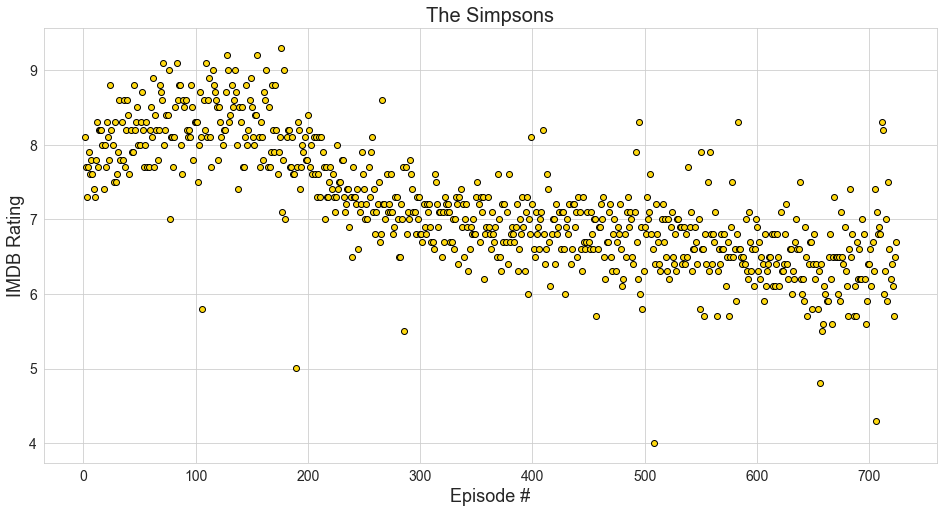

In [28]:
plt.figure(figsize=(16,8))

plt.scatter(range(1, len(ratings)+1), 
            ratings,
            c = '#FFD90F',
            edgecolor = 'black')

plt.xlabel("Episode #", fontsize=18)
plt.ylabel("IMDB Rating", fontsize=18)

plt.title("The Simpsons", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

##### 5. [Slightly More Advanced Question] Scraping 538 politics

You are hired by a clickbait creation company that wants to completely eliminate the need for writers by creating a clickbait generation algorithm. You have been tasked with scraping article data from 538's Politics beat that someone else on the company's team will use in the generation algorithm.

##### a. Titles and urls

To start, write a script using `BeautifulSoup` to scrape the post titles and urls for the first five pages of results for the "Politics" tab on <a href="https://fivethirtyeight.com">https://fivethirtyeight.com</a>.
    
<i>Hint: A good starting point would be to explore <a href="https://fivethirtyeight.com/politics/">https://fivethirtyeight.com/politics/</a>, and cross-reference what we did in the notebook `5. Web Scraping with BeautifulSoup.ipynb`.</i>

##### Sample Solution

In [29]:
## We will want to sleep a bit between each request
from time import sleep

In [30]:
## This function finds the data for the banner post
def get_banner_post(soup):
    ## the title
    ## code copied from lecture notebook
    title = soup.find('div', {'class':"featured-banner"}).find('div', {'class':"post-info"}).find('h2', {'class':"article-title entry-title"}).text.strip()

    ## the href
    ## code copied from lecture notebook
    href = soup.find('div', {'class':"featured-banner"}).find('div', {'class':"post-info"}).find('h2', {'class':"article-title entry-title"}).a['href']
    
    return title, href

## This function gets the data for the non-banner posts
def get_nonbanner_posts(soup):
    titles = []
    hrefs = []
    for div in soup.find('div', {'class':"posts content-area"}).find_all('div', {'class':"post-info"}):
        ## titles
        if div.find('h2', {'class':"article-title entry-title"}):
            ## I clean the text here to remove annoying white space
            titles.append(div.find('h2', {'class':"article-title entry-title"}).text.replace("\n", " ").strip())
        elif div.find('h3', {'class':"article-title entry-title"}):
            titles.append(div.find('h3', {'class':"article-title entry-title"}).text.replace("\n", " ").strip())
        
        
        
        
        ## hrefs
        ## it's good practice to check that the element you're expecting
        ## to be there is actually there before 
        if div.find('h2', {'class':"article-title entry-title"}).a:
            ## I clean the text here to remove annoying white space
            hrefs.append(div.find('h2', {'class':"article-title entry-title"}).a['href'])
        elif div.find('h3', {'class':"article-title entry-title"}).a:
            hrefs.append(div.find('h3', {'class':"article-title entry-title"}).a['href'])

    return titles, hrefs

In [31]:
titles = []
hrefs = []

base_url = "https://fivethirtyeight.com/politics/features/page/"

## for the first 5 pages
for i in range(1,6):
    html = requests.get(base_url + str(i) + "/")
    soup = BeautifulSoup(html.content, 'html.parser')
    
    ## if we are on the first page
    if i == 1:
        ## first get the banner
        title, href = get_banner_post(soup)
        titles.append(title)
        hrefs.append(href)
        
        ## Then get the rest
        page_titles, page_hrefs = get_nonbanner_posts(soup)
        titles.extend(page_titles)
        hrefs.extend(page_hrefs)
    else:
        page_titles, page_hrefs = get_nonbanner_posts(soup)
        titles.extend(page_titles)
        hrefs.extend(page_hrefs)
        
    ## sleep for 3 secs
    sleep(3)

In [32]:
post_df = pd.DataFrame({'title':titles,
                             'href':hrefs})

##### b. Identifying written posts or "features"

Not all of the posts are written features, some are video content. Write a script that will get rid of the video posts and leave only the written features.

<i>Hint: look at the hrefs of each post.</i>

##### Sample Solution

In [33]:
feature_df = post_df.loc[post_df.href.str.contains("/features/")].copy()

In [34]:
feature_df

,title,href
1,"Where Americans Stand On Abortion, In 5 Charts",https://fivethirtyeight.com/features/where-ame...
2,The 10 Governorships Most Likely To Flip Parti...,https://fivethirtyeight.com/features/where-the...
4,What Would Striking Down Roe v. Wade Mean For ...,https://fivethirtyeight.com/features/the-supre...
6,States Aren’t Waiting For The Supreme Court To...,https://fivethirtyeight.com/features/states-ar...
9,Races To Watch In The Indiana And Ohio Primaries,https://fivethirtyeight.com/features/everythin...
10,The GOP Primary For Ohio Senate Will Be A Test...,https://fivethirtyeight.com/features/the-gop-p...
11,Why Twitter Is Unlikely To Become The ‘Digital...,https://fivethirtyeight.com/features/why-twitt...
14,What Can Special Elections So Far Tell Us Abou...,https://fivethirtyeight.com/features/what-can-...
15,New York Just Cost Democrats Their Big Redistr...,https://fivethirtyeight.com/features/new-york-...
17,Were The Stimulus Checks A Mistake?,https://fivethirtyeight.com/features/were-the-...


##### c. Scraping the text

Write a script that will take the href from one of these feature posts and return the written text of the article.

##### Sample Solution

In [35]:
## This function takes in soup
## and returns the feature text
def get_feature_text(soup):
    ## feature text is stored in a 'p' with the 'data-paragraph'="main"
    ## This is a list comprehension that gets the stripped text of all such 'p's
    ## and then " ".join concatenates the results as strings with a space between
    ## the texts
    return " ".join([p.text.strip() for p in soup.find_all('p', {'data-paragraph':"main"})])

In [36]:
## Demonstration on a single article
test_url = feature_df.href.values[0]

test_html = requests.get(test_url)

test_soup = BeautifulSoup(test_html.content, 'html.parser')

get_feature_text(test_soup)

'Late Monday, we learned that the Supreme Court may be ready to overturn Roe v. Wade, the landmark 1973 decision that established the constitutional right to abortion. Abortion is a thorny issue in American life. It’s not something people like to talk about, and it’s not something people know that much about. Because of that, it’s hard to understand how Americans really think about abortion and how many Americans would react if Roe were overturned. There is one point, though, in this debate that is clear: The majority of Americans don’t want to overturn Roe. How polls ask about support varies, but the vast majority of respondents — somewhere between 85 and 90 percent, according to most polls — think abortion should be legal in at least some circumstances. We only have one poll taken after the Supreme Court draft opinion was leaked, but a May 3 Morning Consult/Politico poll also found that most don’t want to overturn Roe — albeit a slim majority, just 50 percent of registered voters. (T

##### d. Scrape all the feature texts

Write a loop to scrape all of the text for the features you just pulled, store the results in a list. Each entry in the list should be the entire text of a single feature. Remember to sleep between url requests, 3 seconds is a reasonable amount of time between each pull.

##### Sample Solution

In [37]:
texts = []

for href in feature_df.href.values:
    print("Working on", href)
    html = requests.get(href)
    
    soup = BeautifulSoup(html.content, 'html.parser')
    
    texts.append(get_feature_text(soup))
    
    sleep(3)

Working on https://fivethirtyeight.com/features/where-americans-stand-on-abortion-in-5-charts/
Working on https://fivethirtyeight.com/features/where-the-gop-could-make-or-break-its-chances-in-10-key-governors-races/
Working on https://fivethirtyeight.com/features/the-supreme-court-could-strike-down-roe-v-wade-what-would-that-mean-for-the-midterms/
Working on https://fivethirtyeight.com/features/states-arent-waiting-for-the-supreme-court-to-rule-on-abortion/
Working on https://fivethirtyeight.com/features/everything-you-need-to-know-about-the-indiana-and-ohio-primaries/
Working on https://fivethirtyeight.com/features/the-gop-primary-for-ohio-senate-will-be-a-test-for-trump-but-probably-a-win-for-trumpism/
Working on https://fivethirtyeight.com/features/why-twitter-is-unlikely-to-become-the-digital-town-square-elon-musk-envisions/
Working on https://fivethirtyeight.com/features/what-can-special-elections-so-far-tell-us-about-the-2022-midterms/
Working on https://fivethirtyeight.com/featu

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)